[Table of Contents](table_of_contents.ipynb)

# Topic 29.  Kuhn Tucker Conditions
Author: Jenna Newcomb; jennewcomb178@gmail.com
    

##  Introduction
The Kuhn Tucker Conditions, commonly known as the KKT conditions, are a set of requirements in nonlinear programming necessary for a point to be optimal. This approach allows inequality constraints by generalizing the method of Lagrange Multipliers. It finds the optimum for a function with both equality and inequality constraints by using a single cost function that encompasses the cost as well as the equality and inequality constraints. The equality constraints are multiplied by a Lagrange multiplier vector $\lambda$. The inequality constraints are multiplied by a Lagrange multiplier vector $\mu$. As seen previously, for equality constraints we differentiate the objective function with respect to $\lambda$ as well as the x variables to solve for all x and $\lambda$ variables. Thus, the solution is restricted to that which meets the necessities of the equality constraints. However, inequality constraints are more difficult since we have to determine which ones are "active." For example, when the overall optimum solution already is within the bounds set by that inequality constraint, we term that constrain "non-active" and its Lagrange multiplier, $\mu_i$, is set to zero. However, if the inequality constraint is active, or in other words, the solution lies at the constraint boundary, then that constraint is set so $g(x^*) = 0$ and the constraint is then solved in a process like the equality constraints. The examples below illustrate this process. In addition, the $\mu$ multipliers can only be less than or equal to zero. The reasoning behind this is explained below.

## Explanation of the theory

Suppose you have the problem:

<center>$\text{minimize}\;\; f(x)$<br>
 $\;\;\;\;\;\;\text{subject to} \;\;h(x) = 0$
 $$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;g(x) \le 0 $$</center>

Allowing $x^*$ to be a local minimum, then there is a Lagrange muliplier $\lambda$, that applies to the equality constraints, and $\mu$, that applies to the inequality constraints, such that
 $$\mu \ge 0$$
 and
 $$g(x^*)^T\mu = 0$$
 $$ \nabla f(x^*) + \nabla h(x^*)\lambda + \nabla g(x^*)\mu = 0$$
 To see why $\mu \ge 0$ consider when an inequality constraint is active:
 $$ \nabla f(x) + \mu\nabla g(x) = 0$$
 $$ \mu = -\frac{\nabla f(x)}{\nabla g(x)}$$
 At an optimum point with an active constraint, the gradient of the objective function ($\nabla f(x)$) and the gradient of the constraint ($\nabla g(x)$) are in opposite directions. Thus, from the above equation, $\mu$ must be positive. <br>
To see why $\mu$ must be zero for non-active constraints, consider:
$$g(x^*)^T\mu = 0$$
Then since $g_i(x)<0$ for a non-active constraint, $\mu$ must be zero to make the above equation true.

## Simple Numerical Examples

We will start with an easy example and progress to a more difficult example. This does not involve the KKT conditions but is a good intro to Lagrange multipliers and optimal conditions.
For the first example suppose you have the problem with one equality constraint. A graphic of the problem is plotted below.
<center>$\text{minimize}\;\; f(x) = x_1+x_2$<br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\text{subject to} \;\; h(x) = x_1^2 + x_2^2 - 8 = 0 $<br></center>
 The necessary conditions are thus
 $$1 + 2\lambda x_1 = 0 $$
 $$ 1 + 2\lambda x_2 = 0 $$
 $$ \lambda(x_1^2+x_2^2-8) = 0 $$
 
 solving these we get:
 $$x_1 = -\frac{1}{2\lambda}$$
 $$x_2 =-\frac{1}{2\lambda}$$
 $$-\frac{1}{2\lambda}^2+-\frac{1}{2\lambda}^2-8=0 $$
 $$\lambda = \pm\frac{1}{4}$$
 $$x_1 =x_2= \pm{2}$$
 To know which point is a minimum, we apply the second-order conditions. 
 A positive-definite Hessian occurs when $\lambda = -\frac{1}{4}$ and thus the minimum is (-2,-2).

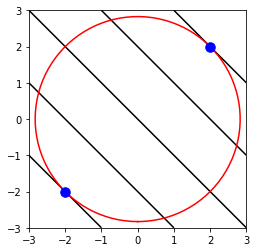

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib

fig = plt.figure()
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)

delta =1
x = np.linspace(-3,3,7)
y = np.linspace(-3,3,7)
X, Y = np.meshgrid(x, y)
Z = X+Y

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.scatter([-2, 2],[-2, 2],s=90,c = 'b',zorder=3)
plt.plot(math.sqrt(8)*np.sin(theta), math.sqrt(8)*np.cos(theta),'r',zorder=2)
plt.contour(X, Y, Z,
                6,
                 colors='k',
                zorder=1)


plt.show()

Moving on to a more difficult example where there are two inequality constraints consider the following optimization problem. The below plot illustrates the function(in black) and constraints (in red).
<center>$\;\;\;\;\;\;\;\;\;\text{minimize}\;\; f(x) = 2x_1^2+3x_2^2-2x_1x_2+x_2$<br>
 $\text{subject to} \;\; h(x) = x_1^2 + x_2^2 - 8 \le 0 $<br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;g(x) =\;2x_1+x_2-5\le0$
 </center>
 The necessary first order conditions are:
 <center> $$4x_1-2x_2+2\mu_1 x_1+2\mu_2 =0$$
 $$6x_2-2x_1+1+2\mu_1 x_2 + \mu_2 = 0 $$
 $$\mu_1(x_1^2 + x_2^2 - 8)+\mu_2(2x_1+x_2-5) = 0 $$
 $$\mu_1\ge 0 \;\;\;\;\;\;\;\; \mu_2 \ge 0 $$</center>
 We will now test different combinations of active and inactive constraints to see which solution is the optimum. <br>
 - __Both constraints are active__<br>
  Looking at the below figure the points of intersection are
  $$x_1 = 2.7746 \;\;\;\; \text{and}\;\;\; x_2 = -0.5492$$
  and
  $$x_1 = 1.2254\;\;\;\; \text{and}\;\;\;\; x_2 = 2.5492$$
  The solutions are $(\mu_1,\mu_2) =(-3.6,3.89016)$ and  $(\mu_1,\mu_2) =(-3.6,4.50984)$.
  Each of these solutions does not satisfy $\mu\ge 0$
 - __$g_1$ is active, $g_2$ is inactive__ <br>
This leads to the following equations:
$$4x_1-2x_2+2\mu_1 x_1 =0$$
 $$6x_2-2x_1+1+2\mu_1 x_2 = 0 $$
 $$x_1^2 + x_2^2 - 8 = 8 $$
 There are four solutions, each one without satisfying $\mu_1\ge 0$
 - __$g_1$ is inactive, $g_2$ is active__ <br>
  This gives the following equations:
  $$4x_1-2x_2+2\mu_2 = 0$$
  $$6x_2-2x_1+1+\mu_2 = 0$$
  $$2x_1+x_2 = 5$$
  Resulting in the following values:
  $$x_1 = 2 \;\;\;\;\;\ x_2 = 1 \;\;\;\;\; \mu_2 =-3$$
 - Since none of these scenerios have $\mu \ge 0$, we set all the constraints to inactive which results in the following equations:
$$4x_1-2x_2 =0$$

 $$6x_2-2x_1+1 = 0 $$
 resulting in the point $(x_1,x_2) = (-1/10,-1/5)$

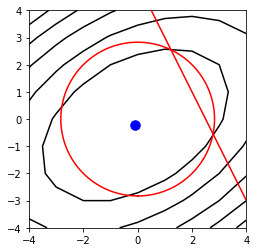

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib

fig = plt.figure()
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)

delta =1
x = np.linspace(-4,4,9)
y = np.linspace(-4,4,9)
X, Y = np.meshgrid(x, y)
Z = 2*X**2+3*Y**2-2*X*Y+Y
x1 = np.linspace(0.5,4,10)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.plot(x1,5-2*x1,'r',zorder =3)
plt.plot(math.sqrt(8)*np.sin(theta), math.sqrt(8)*np.cos(theta),'r',zorder=2)
plt.contour(X, Y, Z,
                6,
                 colors='k',
                zorder=1)

plt.scatter(-.1,-.2,s=90,c = 'b',zorder=3)
plt.show()

## An Engineering Application

Suppose you were tasked with minimizing the tensile stress,$\sigma$, in a beam. The beam is subjected to a 55 kip load. You needed to choose the width (w) and height(h) of the beam. However, due to sizing limitations, the area needed to be less than 20 square inches and the perimeter needed to be less than 20 inches.

1. First off lets rewrite the equation into an optimization problem:
<center>$\text{minimize}\;\; f(x) = \frac{55*1000}{wh}$<br>
 $\;\;\;\;\;\;\;\;\;\text{subject to} \;\; g(x) = wh-20 \le 0 $<br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;g(x) =\;2*h+2*w-18\le0$
 </center>
<br><br>*** Note if you do not have sympy installed for jupyter notebook you need to run the following code in a cell:<br>
!pip install --upgrade<br>
!pip install sympy <br>
import sympy<br>

In [63]:
import numpy as np
from sympy import *
# initialize variables and functions
w = Symbol('w')
h = Symbol('h')
u1 = Symbol('u1')
u2 = Symbol('u2')
f = 55*1000/(w*h)
g1 = w*h-20
g2 = 2*h+2*w-18
# necessary first order conditions
foc1 = sympy.diff(f,w)+ u1*sympy.diff(g1,w)+ u2*sympy.diff(g2,w)
print 'The first order conditions are'
print  foc1
foc2 = sympy.diff(f,h)+ u1*sympy.diff(g1,h)+ u2*sympy.diff(g2,h)
print foc2
foc3 = u1*g1+u2*g2
print foc3
# Let's start by checking the case where g1 is active and g2 is inactive, this gives us the following equations
foc1g1 =h*u1 -55*1000/(h*w**2)
foc2g1 = u1*w-55*1000/(h**2*w)
foc3g1 =h*w -20
ans = nsolve([foc1g1,foc2g1,foc3g1],[w, h, u1], [4, 4, 1])
print 'width,height,u1 ='
print ans
perimeter = 4*4.47213595499958
print 'The perimeter is' 
print perimeter

The first order conditions are
h*u1 + 2*u2 - 55000/(h*w**2)
u1*w + 2*u2 - 55000/(h**2*w)
u1*(h*w - 20) + u2*(2*h + 2*w - 18)
width,height,u1 =
Matrix([[4.47213595499958], [4.47213595499958], [137.500000000000]])
The perimeter is
17.88854382


Since $\mu_1$ is greater than zero and $\mu_2$ is zero, we know we found a solution. Checking the solution, the answers we got for the width and height are multiplied together to get 20. When the perimeter is calculated, the result is 17.89 inches, which meets the requirement of being less than 18 inches.